#                                 "Predict Volume of Traffic on a given day for a given City"

**OVERVIEW**

Inspired by a project a friend of mine in Civil Engineering Department Illinois Institute of Technology, Chicago, did it for "city of chicago" in 2006 to help improve infrastructure and traffic flow.

## Goals: 

  1. 
Traffic Signal Optimization: Predict traffic volume to optimize traffic signal timing and minimize congestion
     
  2. 
Real-time Traffic Management: Alert drivers to traffic conditions along their preferred route
     
  3.  
Emergency Preparedness: Estimate traffic flow in the event of emergencies or disaste

  4. . 
Travel Time Estimation: Provide accurate travel time predictions to commuters and travel
 
  5. s. 
Support Infrastructure Development: Expansion of roads, parking lots development.




# Expolatory Data Analysis : Business Understanding/Data Understanding

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [266]:
###########################################README File Explains the Process
with open('README.md', 'r') as f:
    text = f.read()

print(text)

### Project Title: Predict Volume of Traffic on a given day for a given City

**Author**
Faiyad A Shayk

#### Executive summary

OVERVIEW

Inspired by a project a friend of mine in Civil Engineering Department Illinois Institute of Technology, Chicago, did it for "city of chicago" in 2006 to help improve infrastructure and traffic flow.

Goals:
1. Traffic Signal Optimization: Predict traffic volume to optimize traffic signal timing and minimize congestion
2. Real-time Traffic Management: Alert drivers to traffic conditions along their preferred route
3. Emergency Preparedness: Estimate traffic flow in the event of emergencies or disaste
4. Travel Time Estimation: Provide accurate travel time predictions to commuters and travel
5. Support Infrastructure Development: Expansion of roads, parking lots development

#### Rationale
Why should anyone care about this question?

Traffic congestion leads to significant productivity losses, costing the U.S. economy billions annually, with drivers 

### Business Understanding

From a city perspective, we are tasked with identifying key drivers for traffic volume.  In the CRISP-DM overview, we are expected to convert this business framing to a data problem definition.  Using a few sentences, reframing the task as a data task with the appropriate technical vocabulary. 

# Business Understanding Phase CRISP-DM Methodology

## Determine Business Objectives
 1. Background - Predict Volume of Traffic on a given day for a given City.
    A. The dataset provided contains 8 years of traffic observations with 9 attributes that may influence the traffic volume.
    B. Some attributes can be derived of the existing ones to meet the business objectives.  
 2. Business Objectives
    A. Business objective is to understand what factors influence the volume of traffic so that they can:
       - Optimize traffic signal timing and minimize congestion.
       - Alert drivers to traffic conditions along their preferred routes.
       - Estimate traffic flow in the event of emergencies or disasters.
       - Provide accurate travel time predictions to commuters and travelers.
       - Expansion of roads, parking lots development. 
    B. Based on findings the final report is provided to the city they can address the needs mentioned in the objectives. 
 3. Business Success Criteria - Success if above two objectives are met.

## Assess Situation
 1. Inventory of Resources - Only one resource working on modeling that is me, machine, access, programs like jyupeter are all installed and ready.
 2. Requirements, Assumptions, and Constraints - Dataset Provided, Assumptions are made based on data quality, time constraint due to data quality.
 3. Risks and Contingencies - skew of results if the data filling is done for some attributes with appropriate techniques, and nulls are deleted.
 4. Terminology - CRISP-DM and Data Mining Terminology to be used.
 5. Costs and Benefits - Project cost and benefits realization would be done only in real world scenario. 

## Determine Data Mining Goals
 1. Data Mining Goals - Gather/clean/construct/integrate/format as much relevent data needed to develop best model possible. 
 2. Data Mining Success Criteria - Working model Validation, Evaluation, accessment and deployment.

## Produce Project Plan
 1. Project P - Data Understanding (Exlore), Data Preparation (clean, construct, format, integrate), Model (Technique, Design, Build, Assess), Evaluate (Model results vs Business Success Criteria), Deploy (Maintainance/Support).
 2. Initial Assessment of Tools and Techniq - Data Mining concepts/Principle Component Analysis/Clustering/K-fold validation/Attribute selection, encodeing/Ensemble Models - RandomForrestRegressor/AdaBoostRegressor/GradientBoostRegressor, Gridsearch to select best model.

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, RFE
import numpy as np
import plotly.express as px
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

In [195]:
#Loading Traffic Volume Dataset into a Dataframe and reviewing datatypes
tv_df = pd.read_csv('data/trafficvolume.csv')
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Rainfall_last_hour  38373 non-null  float64
 3   Snowfall_last_hour  38373 non-null  float64
 4   Cloud_Cover         38373 non-null  int64  
 5   Weather             38373 non-null  object 
 6   Weather_Desc        38373 non-null  object 
 7   TimeStamp           38373 non-null  object 
 8   Date                38373 non-null  object 
 9   Traffic_Vol         38373 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 2.9+ MB


In [6]:
tv_df.head()

Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0      NaN       289.28                 0.0                 0.0           40   
1      NaN       290.26                 0.0                 0.0           75   
2      NaN       290.28                 0.0                 0.0           90   
3      NaN       290.33                 0.0                 0.0           90   
4      NaN       292.14                 0.0                 0.0           75   

        Weather         Weather_Desc       TimeStamp      Date  Traffic_Vol  
0  Cloudy skies  Partly cloudy skies   02/10/08 9:00  02/10/08         5555  
1  Cloudy skies    Fragmented clouds  02/10/08 10:00  02/10/08         4525  
2  Cloudy skies     Full cloud cover  02/10/08 11:00  02/10/08         4772  
3  Cloudy skies     Full cloud cover  02/10/08 12:00  02/10/08         5031  
4  Cloudy skies    Fragmented clouds  02/10/08 13:00  02/10/08         4928

In [196]:
tv_df.describe()

Holiday   Temperature  Rainfall_last_hour  Snowfall_last_hour  \
count     50.0  38373.000000        38373.000000        38373.000000   
mean       1.0    281.152767            0.327486            0.000128   
std        0.0     13.813324           50.194024            0.005924   
min        1.0      0.300000            0.000000            0.000000   
25%        1.0    271.910000            0.000000            0.000000   
50%        1.0    281.990000            0.000000            0.000000   
75%        1.0    292.140000            0.000000            0.000000   
max        1.0    310.970000         9831.414286            0.512857   

        Cloud_Cover   Traffic_Vol  
count  38373.000000  38373.000000  
mean      44.821098   3293.947567  
std       38.749566   1988.311540  
min        0.000000      4.000000  
25%        1.000000   1246.000000  
50%       40.000000   3425.000000  
75%       90.000000   4964.000000  
max      101.000000   7289.000000

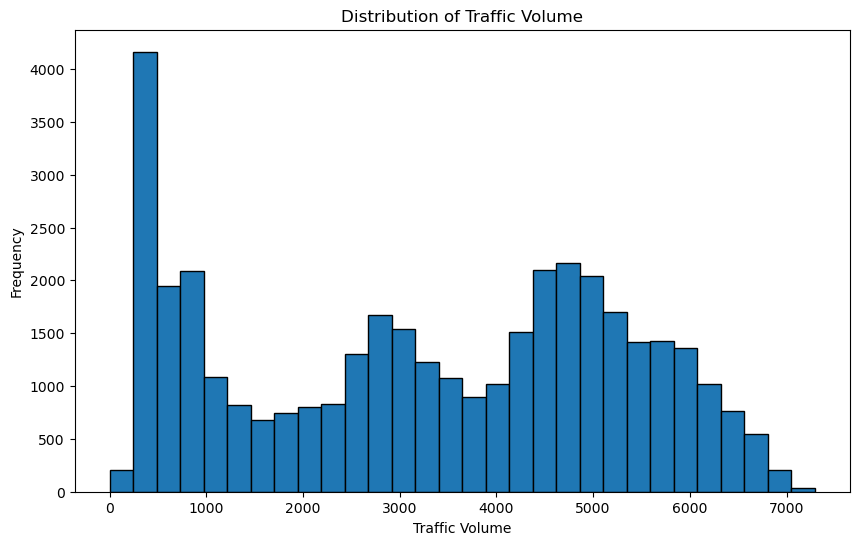

In [197]:
#checking the data distribution
plt.figure(figsize=(10, 6))
plt.hist(tv_df['Traffic_Vol'], bins=30, edgecolor='black')  # 30 bins
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

<Axes: >

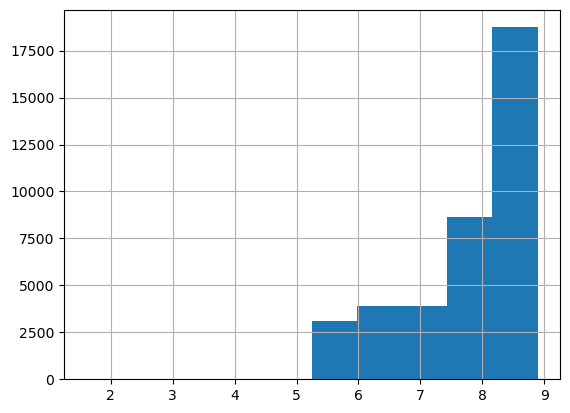

In [198]:
#Log of Traffic Volume - skewed to left
np.log1p(tv_df['Traffic_Vol']).hist()
#plt.show()

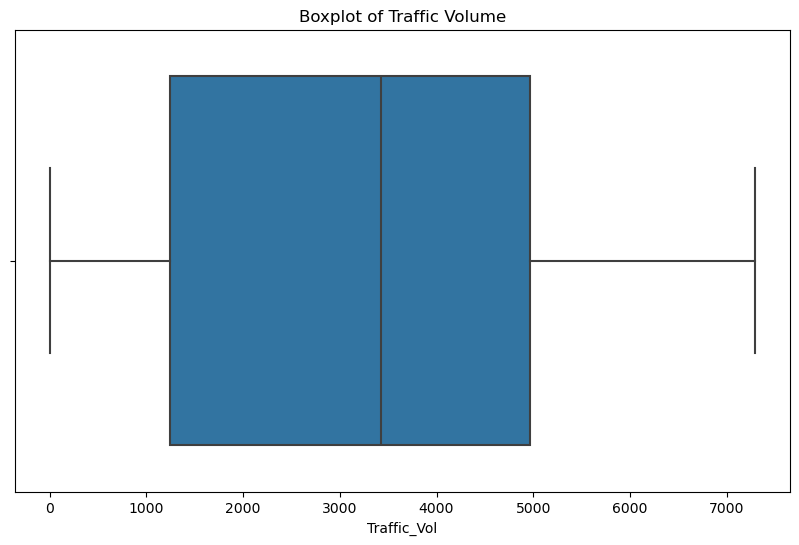

In [199]:
#Checking for potential outliers in Target column/variable. 
plt.figure(figsize=(10, 6))
sns.boxplot(x=tv_df['Traffic_Vol'])
plt.title('Boxplot of Traffic Volume')
plt.show()

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Data Understanding Phase CRISP-DM Methodology

## Collect Initial Data

 1. Initial Data Collection Report

    - The dataset .csv file obtained from business contains the some of the important features that influence the traffic volume.
    - Some may be highly influencial like weather reading and some are less influencial like weekday which is yet to be seen in while developing model.

## Describe Data

 1. Data Description Report

    - Most Features have the data except Holiday which has data with most NaN's.
    - Most Features are associated with weather condition and many more atributes (30+) can be derived from this attribute for refining the model.
    - Date has timestamp which would make this prediction down to hourly which would meet the business objectives.

## Explore Data

 1. Data Exploration Report

    - Dataset has 38373 observations and 10 variables including the Target Variable.
    - weather attribute has list of conditions so many more atributes (30+) can be derived from this attribute for refining the model.
    - linear model plot - plotted between Volume vs Temperature and Volume vs Snowfall reveiled correlation between these features.
    - Volume - Logarthemic value shows skew towards left and Boxplot shows no outliers.
    - Teperature is in Kelvin. Kelvin is Absolute Scale wiht no negative values so, to simplify calculations and avoid potential issues keeping it as is - best practice in machine learning applications.

## Verify Data Quality

 1. Data Quality Report

    - Data distribution of Target variale is spread tightly without any outliers. Log plot reviels data skewed left.
    - Holiday attribute is not captured comprehensively for all 5 years so it has to be updated as it will have great influence of volume of traffic especially if it falls a day before (ex.Thanksgiving) or after the weekend as people tend to take day off on the working day in the middle.
    - Weather captures all different conditions (30+) giving the oppurtunity for model to consider all of them to minimize the mean squared error.
    - Null exists only in Holiday attribute.


In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, RFE
import numpy as np
import plotly.express as px
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error

In [200]:
###########################################README File Explains the Process
with open('Data_Description.txt', 'r') as f:
    text = f.read()

print(text)

The Great Indian Hiring Hackathon 2024 Dataset
----------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 38374

    :Number of Attributes: 9 predictive attributes and the target


    :Attribute Information:

	  - Holiday	              Day is holiday
	  - Temperature	        Temperature in Kelvin
	  - Rainfall_last_hour	  Railfall in inches
	  - Snowfall_last_hour	  Snowfall in inches
	  - Cloud_Cover	        1-100 percentage
	  - Weather	              Clould condition - Cloudy skies, Clear skies, Rainfall etc
	  - Weather_Desc	        Partly cloudy skies, Fragmented clouds, Soft rain etc
	  - TimeStamp	        Data with Hour
	  - Date	              Date
	  - Traffic_Vol           number of Vehicles on the road

    :Missing Attribute Values: Holidays

This dataset was obtained from the machinehack.com repository.
The Great Indian Hiring Hackathon 2024... (machinehack.com)

The target variable is the volume of the traffic ata given hour of

<font size="6">***###Explore Data and Verify Data Quality###***</font>

In [202]:
tv_df.shape

(38373, 10)

<Axes: >

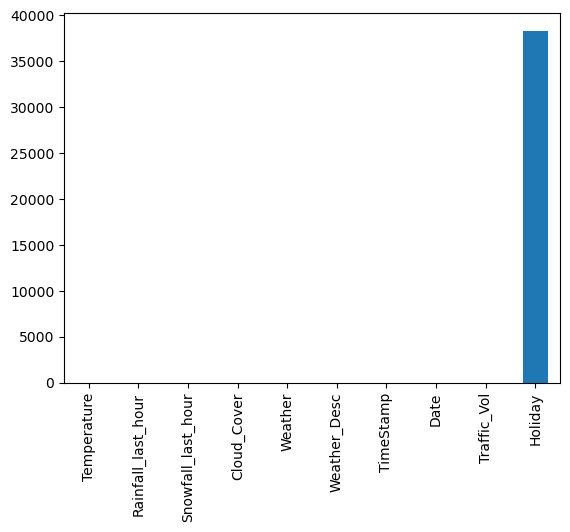

In [203]:
#Checking null values in each attribute column
tv_df.isnull().sum().sort_values().plot(kind = 'bar')

In [204]:
#checking duplicates - no duplicates exist
tv_df.duplicated().sum()

0

In [205]:
#Checking weather attribute for categorical data to encode potentially 11 more attributes
tv_df['Weather'].value_counts()

Weather
Cloudy skies          14477
Clear skies           12682
Rainfall               4204
Light fog              2889
Snowfall               2297
Airborne particles      736
Light rain              497
Stormy weather          395
Dense fog               182
Airborne smoke           13
Sudden windstorm          1
Name: count, dtype: int64

In [206]:
#Checking Weather_Desc attribute for categorical data to encode potentially 34 attributes
tv_df['Weather_Desc'].value_counts()

Weather_Desc
Clear skies                            12682
Full cloud cover                        4947
Fragmented clouds                       4455
Partly cloudy skies                     3232
Fine fog                                2889
Soft rain                               2530
Scattered clouds                        1843
Flurries                                1588
Steady rain                             1182
Smoky air                                736
Deep snow                                500
Intense rainfall                         365
Mild drizzle                             345
Approaching thunderstorm                 290
Snowfall                                 192
Dense fog                                182
Light rain                               135
Nearby rain showers                       98
Stormy weather                            53
Storm with mild rain                      21
Torrential downpour                       18
Strong drizzle                            

In [207]:
#finding correlation between numerical columns Temprature, Rainfall, Snowfall and Cloudcover
tv_df_corr = tv_df.drop(columns = ['Weather','Weather_Desc','TimeStamp','Date','Holiday','Traffic_Vol'])

<Axes: >

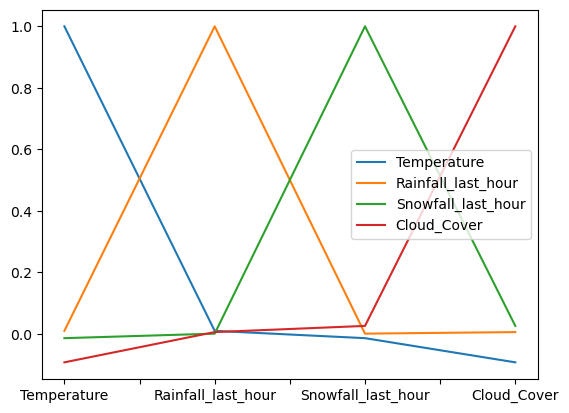

In [208]:
tv_df_corr.corr().plot()

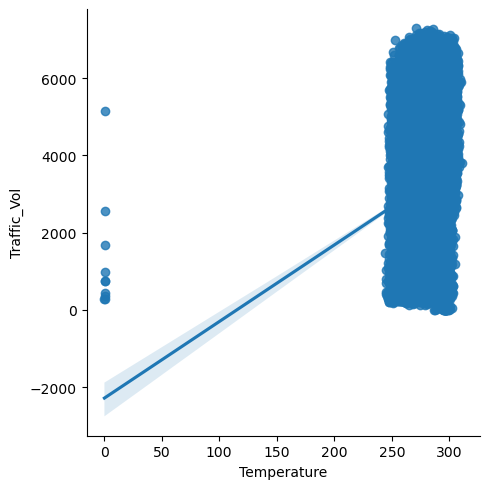

In [209]:
#traffic volume vs temperature range - from 240 kelvin to 320 kelvin which is -27F to 116F
#Traffic Volume has a linear relationship with Temperature
sns.lmplot(x="Temperature", y="Traffic_Vol", data=tv_df);

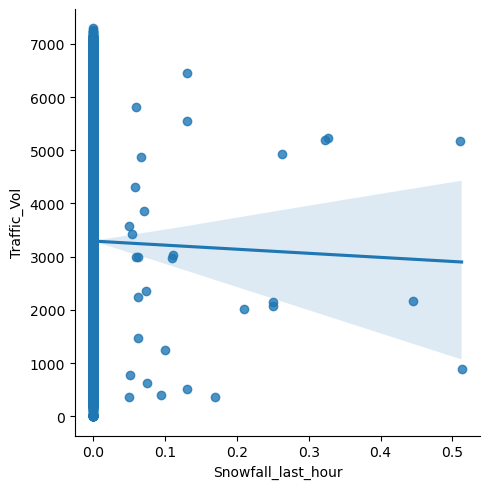

In [210]:
#traffic volume generally decreases during and/or after snowfall
sns.lmplot(x="Snowfall_last_hour", y="Traffic_Vol", data=tv_df);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Cloudy skies'),
  Text(1, 0, 'Clear skies'),
  Text(2, 0, 'Rainfall'),
  Text(3, 0, 'Light rain'),
  Text(4, 0, 'Light fog'),
  Text(5, 0, 'Dense fog'),
  Text(6, 0, 'Stormy weather'),
  Text(7, 0, 'Airborne particles'),
  Text(8, 0, 'Snowfall'),
  Text(9, 0, 'Sudden windstorm'),
  Text(10, 0, 'Airborne smoke')])

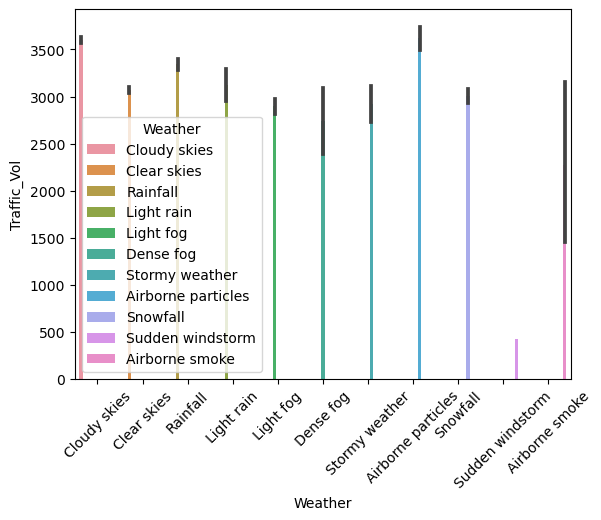

In [211]:
#Traffic volume has not much impact except "sudden windstorm"
sns.barplot(x="Weather", y="Traffic_Vol", hue = "Weather",data=tv_df)
plt.xticks(rotation=45)

(array([0]), [Text(0, 0, '1.0')])

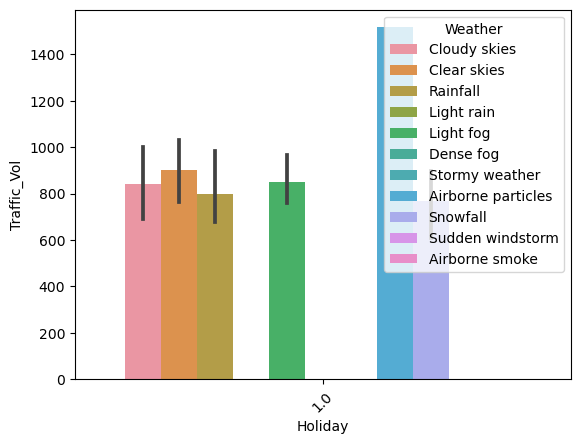

In [212]:
#Traffic volume during holidays - insufficient data to be filled by US Holidays
#pip install --upgrade holidays and work with holiday function to populate this attribute as 
#this will have impact on traffic especially in areas that expeirnece snow.
sns.barplot(x="Holiday", y="Traffic_Vol", hue = "Weather",data=tv_df)
plt.xticks(rotation=45)

In [213]:
#Checking null values in Holiday attribute column - Null values are 38323, 50 are not null
# the Holiday data shows not all holidays are captured so has to be filled as usually the traffic volume is high during holidays
tv_df[tv_df['Holiday'].notna()].head()

Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  \
126       1.0       274.08                 0.0                 0.0   
926       1.0       288.62                 0.0                 0.0   
1164      1.0       279.24                 0.0                 0.0   
1938      1.0       265.10                 0.0                 0.0   
2103      1.0       263.89                 0.0                 0.0   

      Cloud_Cover       Weather       Weather_Desc      TimeStamp      Date  \
126            20  Cloudy skies   Scattered clouds  08/10/08 0:00  08/10/08   
926            87   Clear skies        Clear skies  12/11/08 0:00  12/11/08   
1164           21     Light fog           Fine fog  22/11/08 0:00  22/11/08   
1938           90  Cloudy skies   Full cloud cover  25/12/08 0:00  25/12/08   
2103           59  Cloudy skies  Fragmented clouds  01/01/09 0:00  01/01/09   

      Traffic_Vol  
126           462  
926          1004  
1164          921  
1938          810  
2103         1442

In [214]:
#Dataset contains 5 years of data 
print (tv_df['Date'].min(),tv_df['Date'].max())

01/01/09 31/12/13


### Assumptions:

   - Diver's licences and cars on the road, 92% of people have cars - dept of buero
   - Existing Cars + prediction of how many more cars will be added to the existing traffic by ADOT (new Drivers added - left state)
   - US Holidays to be populated
   - This model should work for any of the US Cities given the data pertaining to that city

### Out of Scope: 

   - Seasonality is out of scope as the focus is to meet the city objective by Optimizing traffic signal timing and minimize congestion, Alert drivers to traffic conditions along their preferred routes, Estimate traffic flow in the event of emergencies or disasters and Provide accurate travel time predictions to commuters and travelers.

### Limitations of Data insights: 

   - like whether a given city is Vacation Destination or a Regular city.

<font size="2">***###Cars Owners Data from different sources from 2021 and 2023###***</font>

<font size="2">***###99% of population has transportation based on the statistica data from 2021 below###***</font>

https://www.statista.com/statistics/1041177/us-car-owners-by-income-group/
![image.png](attachment:bb8d97cd-a79c-455f-b864-b56c477f2083.png)

<font size="2">***###92% of population has transportation based on www.autoinsurance.com - Source: U.S. Census Bureau###***</font>

https://www.autoinsurance.com/research/car-ownership-statistics/

Assumptions made: No rolling average be added to the model and is only at descretion of City in future improvement of model.

  - Diver's licences and cars on the road: 92% of people have cars - dept of buero
  - Existing Cars + Rolling Average
  - Rolling Average: How many cars are added to the existing traffic by City (new Drivers added minus Drivers left state) for precise volume prediction.

### Plan of Action for Data Preparation: 

1. Fill holiday - pip install --upgrade holidays
2. Encode weather for initial validation
3. Encode weather_desc for final model training
4. Breakdown TimeStamp attribute into Year, Month, Day (weekday/weekend) and Hour

### Note:

   - Temperature Attribue: Teperature is in Kelvin
   - Kelvin is Absolute Scale wiht no negative values so, to simplify calculations and avoid potential issues keeping it as is.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

# Data Preparation Phase CRISP-DM Methodology

## Data Set
 1. Data Set Description

    - Dataset has 38373 observations and 10 variables including the Target Variable.
    - weather attribute has list of conditions so many more atributes (30+) can be derived from this attribute for refining the model.
    - linear model plot - plotted between Volume vs Temperature and Volume vs Snowfall reveiled correlation between these features.
    - Volume - Logarthemic value shows skew towards left and Boxplot shows no outliers.
    - Most Features have the data except Holiday which has data with most NaN's.
    - Most Features are associated with weather condition and many more atributes (30+) can be derived from this attribute for refining the model.
    - Date has timestamp which would make this prediction down to hourly which would meet the business objectives.
    - Teperature is in Kelvin. Kelvin is Absolute Scale wiht no negative values so, to simplify calculations and avoid potential issues keeping it as is - best practice in machine learning applications.
      
## Select Data
 1. Rationale for Inclusion / Exclu
    
    #### Included:
    - All core attributes are kept.
    #### Excluded:
    - Attributes 'Weather' and 'Date' were excluded as 'Weather_Desc' and 'TimeStamp' had all details.
## Clean Data
 1. Data Cleaning Report
    - Data was clean except that 'Holiday' attribute was not properly populated.
## Construct Data
 1. Derived Attributes:
   - New weather attributes of about 30+ were derived using Onehotencoder on categorical values.
   - New attributes Year, Month, Day, Hour were dreived from 'TimeStamp' attribute.
 2. Records Generated:
    - No new records were generated.
## Integrate Data
 1. Merged 
    - For a brief moment thought spliting the data into to dataframes and then filling the missing 'Holiday' attribure data but it was too time consuming a task to fix few observations so avoided it.
## Format Data
 1. Reformatted :
    - No reformatting was done.

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
from datetime import date
import holidays

In [216]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Rainfall_last_hour  38373 non-null  float64
 3   Snowfall_last_hour  38373 non-null  float64
 4   Cloud_Cover         38373 non-null  int64  
 5   Weather             38373 non-null  object 
 6   Weather_Desc        38373 non-null  object 
 7   TimeStamp           38373 non-null  object 
 8   Date                38373 non-null  object 
 9   Traffic_Vol         38373 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 2.9+ MB


In [217]:
#Chaning the naming convention of Dataframe to reflect the phase data preparation phase - Dataframe_dp
tv_df_dp = tv_df
tv_df_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Rainfall_last_hour  38373 non-null  float64
 3   Snowfall_last_hour  38373 non-null  float64
 4   Cloud_Cover         38373 non-null  int64  
 5   Weather             38373 non-null  object 
 6   Weather_Desc        38373 non-null  object 
 7   TimeStamp           38373 non-null  object 
 8   Date                38373 non-null  object 
 9   Traffic_Vol         38373 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 2.9+ MB


In [219]:
#Changing the TimeStamp attribute from object to datetime format 
tv_df_dp['TimeStamp'] = pd.to_datetime(tv_df_dp['TimeStamp'])

In [220]:
tv_df_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Holiday             50 non-null     float64       
 1   Temperature         38373 non-null  float64       
 2   Rainfall_last_hour  38373 non-null  float64       
 3   Snowfall_last_hour  38373 non-null  float64       
 4   Cloud_Cover         38373 non-null  int64         
 5   Weather             38373 non-null  object        
 6   Weather_Desc        38373 non-null  object        
 7   TimeStamp           38373 non-null  datetime64[ns]
 8   Date                38373 non-null  object        
 9   Traffic_Vol         38373 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 2.9+ MB


In [221]:
#Deriving new attributes year, month, day and hour from Timestamp to create new parameters crucial for modeling
tv_df_dp['Year'] = tv_df_dp['TimeStamp'].dt.year
tv_df_dp['Month'] = tv_df_dp['TimeStamp'].dt.month
tv_df_dp['Day'] = tv_df_dp['TimeStamp'].dt.day
tv_df_dp['Hour'] = tv_df_dp['TimeStamp'].dt.hour

In [74]:
tv_df_dp.head()

Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0      NaN       289.28                 0.0                 0.0           40   
1      NaN       290.26                 0.0                 0.0           75   
2      NaN       290.28                 0.0                 0.0           90   
3      NaN       290.33                 0.0                 0.0           90   
4      NaN       292.14                 0.0                 0.0           75   

        Weather         Weather_Desc           TimeStamp      Date  \
0  Cloudy skies  Partly cloudy skies 2008-02-10 09:00:00  02/10/08   
1  Cloudy skies    Fragmented clouds 2008-02-10 10:00:00  02/10/08   
2  Cloudy skies     Full cloud cover 2008-02-10 11:00:00  02/10/08   
3  Cloudy skies     Full cloud cover 2008-02-10 12:00:00  02/10/08   
4  Cloudy skies    Fragmented clouds 2008-02-10 13:00:00  02/10/08   

   Traffic_Vol  Year  Month  Day  Hour  dayofweek  is_weekend  
0         5555  2008      2   10     9          6        True  
1         4525  2008      2   10    10          6        True  
2         4772  2008      2   10    11          6        True  
3         5031  2008      2   10    12          6        True  
4         4928  2008      2   10    13          6        True

In [222]:
#Deriving weekdays and weekends as weekends would have huge impact on the traffic volume and prediction accuracy of model
tv_df_dp['dayofweek'] = tv_df_dp['TimeStamp'].dt.dayofweek 
tv_df_dp['is_weekend'] = tv_df_dp['TimeStamp'].dt.dayofweek >= 5  

In [223]:
tv_df_dp.head()

Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0      NaN       289.28                 0.0                 0.0           40   
1      NaN       290.26                 0.0                 0.0           75   
2      NaN       290.28                 0.0                 0.0           90   
3      NaN       290.33                 0.0                 0.0           90   
4      NaN       292.14                 0.0                 0.0           75   

        Weather         Weather_Desc           TimeStamp      Date  \
0  Cloudy skies  Partly cloudy skies 2008-02-10 09:00:00  02/10/08   
1  Cloudy skies    Fragmented clouds 2008-02-10 10:00:00  02/10/08   
2  Cloudy skies     Full cloud cover 2008-02-10 11:00:00  02/10/08   
3  Cloudy skies     Full cloud cover 2008-02-10 12:00:00  02/10/08   
4  Cloudy skies    Fragmented clouds 2008-02-10 13:00:00  02/10/08   

   Traffic_Vol  Year  Month  Day  Hour  dayofweek  is_weekend  
0         5555  2008      2   10     9          6        True  
1         4525  2008      2   10    10          6        True  
2         4772  2008      2   10    11          6        True  
3         5031  2008      2   10    12          6        True  
4         4928  2008      2   10    13          6        True

In [224]:
#Dropping TimeStamp column as we have created derived attributes from it and is not required anymore for modeling 
tv_df_dp = tv_df_dp.drop('TimeStamp', axis= 1)
tv_df_dp.head()

Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0      NaN       289.28                 0.0                 0.0           40   
1      NaN       290.26                 0.0                 0.0           75   
2      NaN       290.28                 0.0                 0.0           90   
3      NaN       290.33                 0.0                 0.0           90   
4      NaN       292.14                 0.0                 0.0           75   

        Weather         Weather_Desc      Date  Traffic_Vol  Year  Month  Day  \
0  Cloudy skies  Partly cloudy skies  02/10/08         5555  2008      2   10   
1  Cloudy skies    Fragmented clouds  02/10/08         4525  2008      2   10   
2  Cloudy skies     Full cloud cover  02/10/08         4772  2008      2   10   
3  Cloudy skies     Full cloud cover  02/10/08         5031  2008      2   10   
4  Cloudy skies    Fragmented clouds  02/10/08         4928  2008      2   10   

   Hour  dayofweek  is_weekend  
0     9          6        True  
1    10          6        True  
2    11          6        True  
3    12          6        True  
4    13          6        True

In [225]:
#Taking backup as Weather and Weather_Desc attributes are to be used for validation (simple) and Modeling (final model) purpose
tv_df_dp_bkp = tv_df_dp

In [226]:
#Dropping date column as it new attributes are already derived from Timestamp attribute
tv_df_dp = tv_df_dp.drop('Date', axis=1)

In [227]:
#Dropping Weather_desc as this data is for validation purpose, but for final model this column will be included
tv_df_dp = tv_df_dp.drop('Weather_Desc', axis = 1)

In [228]:
#converting categorical data from weather into numerical using one hot encoding
tv_df_dp = pd.get_dummies(tv_df_dp, columns = ['Weather'])

In [229]:
tv_df_dp.head()

Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0      NaN       289.28                 0.0                 0.0           40   
1      NaN       290.26                 0.0                 0.0           75   
2      NaN       290.28                 0.0                 0.0           90   
3      NaN       290.33                 0.0                 0.0           90   
4      NaN       292.14                 0.0                 0.0           75   

   Traffic_Vol  Year  Month  Day  Hour  ...  Weather_Airborne smoke  \
0         5555  2008      2   10     9  ...                   False   
1         4525  2008      2   10    10  ...                   False   
2         4772  2008      2   10    11  ...                   False   
3         5031  2008      2   10    12  ...                   False   
4         4928  2008      2   10    13  ...                   False   

   Weather_Clear skies  Weather_Cloudy skies  Weather_Dense fog  \
0                False                  True              False   
1                False                  True              False   
2                False                  True              False   
3                False                  True              False   
4                False                  True              False   

   Weather_Light fog  Weather_Light rain  Weather_Rainfall  Weather_Snowfall  \
0              False               False             False             False   
1              False               False             False             False   
2              False               False             False             False   
3              False               False             False             False   
4              False               False             False             False   

   Weather_Stormy weather  Weather_Sudden windstorm  
0                   False                     False  
1                   False                     False  
2                   False                     False  
3                   False                     False  
4                   False                     False  

[5 rows x 23 columns]

In [230]:
#Holiday attribute has NaN so replacing it with zero for validation only
tv_df_dp['Holiday'] = tv_df_dp['Holiday'].fillna(0)

In [231]:
tv_df_dp.head()

Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0      0.0       289.28                 0.0                 0.0           40   
1      0.0       290.26                 0.0                 0.0           75   
2      0.0       290.28                 0.0                 0.0           90   
3      0.0       290.33                 0.0                 0.0           90   
4      0.0       292.14                 0.0                 0.0           75   

   Traffic_Vol  Year  Month  Day  Hour  ...  Weather_Airborne smoke  \
0         5555  2008      2   10     9  ...                   False   
1         4525  2008      2   10    10  ...                   False   
2         4772  2008      2   10    11  ...                   False   
3         5031  2008      2   10    12  ...                   False   
4         4928  2008      2   10    13  ...                   False   

   Weather_Clear skies  Weather_Cloudy skies  Weather_Dense fog  \
0                False                  True              False   
1                False                  True              False   
2                False                  True              False   
3                False                  True              False   
4                False                  True              False   

   Weather_Light fog  Weather_Light rain  Weather_Rainfall  Weather_Snowfall  \
0              False               False             False             False   
1              False               False             False             False   
2              False               False             False             False   
3              False               False             False             False   
4              False               False             False             False   

   Weather_Stormy weather  Weather_Sudden windstorm  
0                   False                     False  
1                   False                     False  
2                   False                     False  
3                   False                     False  
4                   False                     False  

[5 rows x 23 columns]

In [232]:
#converting the data type of newly created categorical columns into integer.
tv_df_dp = tv_df_dp.astype(int)

In [86]:
tv_df_dp.head()

Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0        0          289                   0                   0           40   
1        0          290                   0                   0           75   
2        0          290                   0                   0           90   
3        0          290                   0                   0           90   
4        0          292                   0                   0           75   

   Traffic_Vol  Year  Month  Day  Hour  ...  Weather_Airborne smoke  \
0         5555  2008      2   10     9  ...                       0   
1         4525  2008      2   10    10  ...                       0   
2         4772  2008      2   10    11  ...                       0   
3         5031  2008      2   10    12  ...                       0   
4         4928  2008      2   10    13  ...                       0   

   Weather_Clear skies  Weather_Cloudy skies  Weather_Dense fog  \
0                    0                     1                  0   
1                    0                     1                  0   
2                    0                     1                  0   
3                    0                     1                  0   
4                    0                     1                  0   

   Weather_Light fog  Weather_Light rain  Weather_Rainfall  Weather_Snowfall  \
0                  0                   0                 0                 0   
1                  0                   0                 0                 0   
2                  0                   0                 0                 0   
3                  0                   0                 0                 0   
4                  0                   0                 0                 0   

   Weather_Stormy weather  Weather_Sudden windstorm  
0                       0                         0  
1                       0                         0  
2                       0                         0  
3                       0                         0  
4                       0                         0  

[5 rows x 23 columns]

In [233]:
tv_df_dp['Traffic_Vol'].mean()

3293.9475672999242

# Using AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor for first time - So smoke testing them out with reduced number of attributes to ensure data quality

In [234]:
X_sample = tv_df_dp.drop('Traffic_Vol', axis = 1)
y_sample = tv_df_dp['Traffic_Vol']

## Smoke Testing AdaBoostRegressor with sample hyperparameters

In [235]:
# Split data into training and validation sets
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_sample, y_sample, test_size=0.8, random_state=42)

# Smoke Testing AdaBoostRegressor with sample hyperparameters
model_sample_abr = AdaBoostRegressor(
    n_estimators=30,            # Number of boosting stages (trees)
    learning_rate=0.15,          # Contribution of each tree in the ensemble
    random_state=42
)

# Fit the model
model_sample_abr.fit(X_sample_train, y_sample_train)

# Predict and evaluate
y_sample_test_pred = model_sample_abr.predict(X_sample_test)
rmse = np.sqrt(mean_squared_error(y_sample_test, y_sample_test_pred))

# Print the validation RMSE
print(f"Validation RMSE: {rmse}")

y_sample_train_pred = model_sample_abr.predict(X_sample_train)

# Calcualting the RMSE as asked
rmse = np.sqrt(mean_squared_error(y_sample_train, y_sample_train_pred))
print(f"train RMSE: {rmse}")

Validation RMSE: 931.6028510929488
train RMSE: 938.6463727411407


Text(0.5, 1.0, 'Feature Importance')

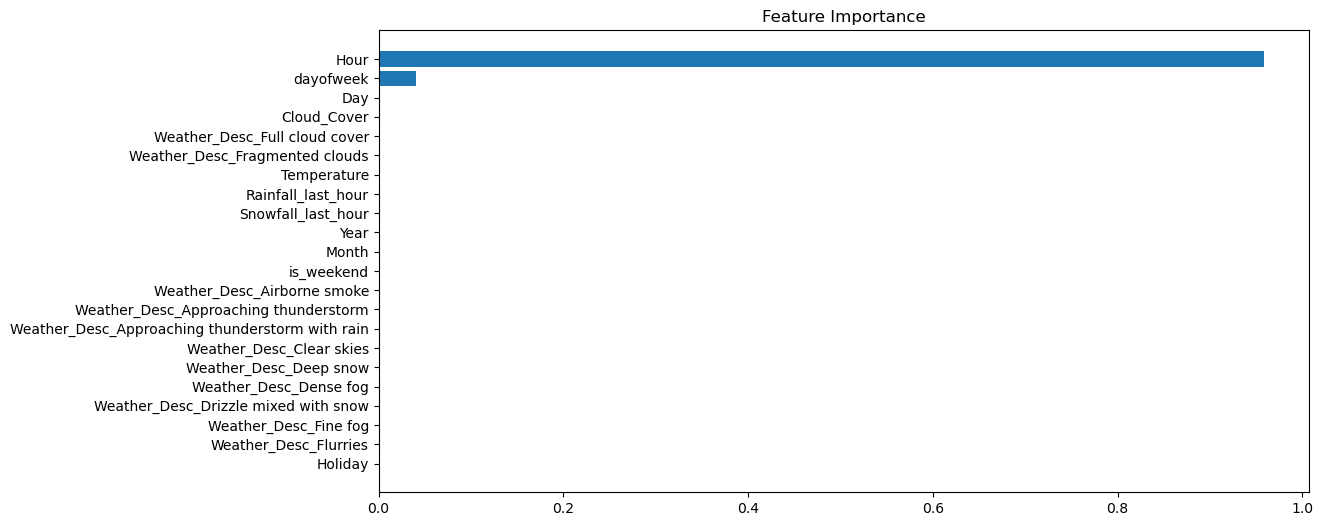

In [236]:
feature_importance_ada = model_sample_abr.feature_importances_
sorted_idx = np.argsort(feature_importance_ada)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance_ada[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

## Smoke Testing GradientBoostingRegressor with sample hyperparameters

In [237]:
# Smoke Testing GradientBoostingRegressor with sample hyperparameters
model_sample_gbr = GradientBoostingRegressor(
    n_estimators=100,            # Number of boosting stages (trees)
    learning_rate=0.1,           # Step size at each iteration to shrink the contribution of each tree
    max_depth=20,                 # Maximum depth of the individual trees
    min_samples_split=10,        # Minimum number of samples required to split an internal node
    min_samples_leaf=2,          # Minimum number of samples required to be at a leaf node
    subsample=0.9,               # Fraction of samples used for fitting each tree
    random_state=42
)

# Fiting the model
model_sample_gbr.fit(X_sample_train, y_sample_train)

# Predict and evaluate
y_sample_test_pred = model_sample_gbr.predict(X_sample_test)
rmse = np.sqrt(mean_squared_error(y_sample_test, y_sample_test_pred))

# Print the validation RMSE
print(f"Test RMSE: {rmse}")

y_train_pred = model_sample_gbr.predict(X_sample_train)

# Calcualting the RMSE
rmse = np.sqrt(mean_squared_error(y_sample_train, y_sample_train_pred))
print(f"train RMSE: {rmse}")


Test RMSE: 687.6880109174175
train RMSE: 938.6463727411407


Text(0.5, 1.0, 'Feature Importance')

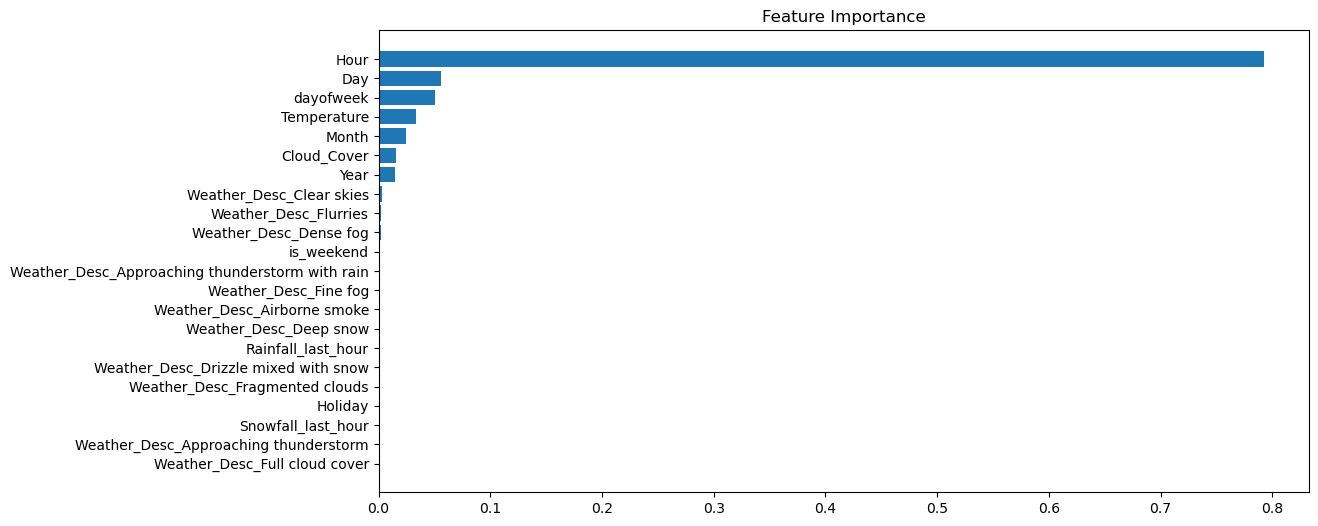

In [238]:
feature_importance = model_sample_gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

## Smoke Testing RandomForestRegressor with sample hyperparameters

In [239]:
# Smoke Testing RandomForestRegressor with sample hyperparameters
model_sample_rfr = RandomForestRegressor(
            n_jobs=-1,
            random_state=42)

# Fit the model
model_sample_rfr.fit(X_sample_train, y_sample_train)

# Predict and evaluate
y_sample_test_pred = model_sample_rfr.predict(X_sample_test)
rmse = np.sqrt(mean_squared_error(y_sample_test, y_sample_test_pred))

# Print the validation RMSE
print(f"Validation RMSE: {rmse}")

y_train_pred = model_sample_rfr.predict(X_sample_train)

# Calcualting the RMSE as asked
rmse = np.sqrt(mean_squared_error(y_sample_train, y_sample_train_pred))
print(f"train RMSE: {rmse}")

Validation RMSE: 686.0206772370435
train RMSE: 938.6463727411407


Text(0.5, 1.0, 'Feature Importance')

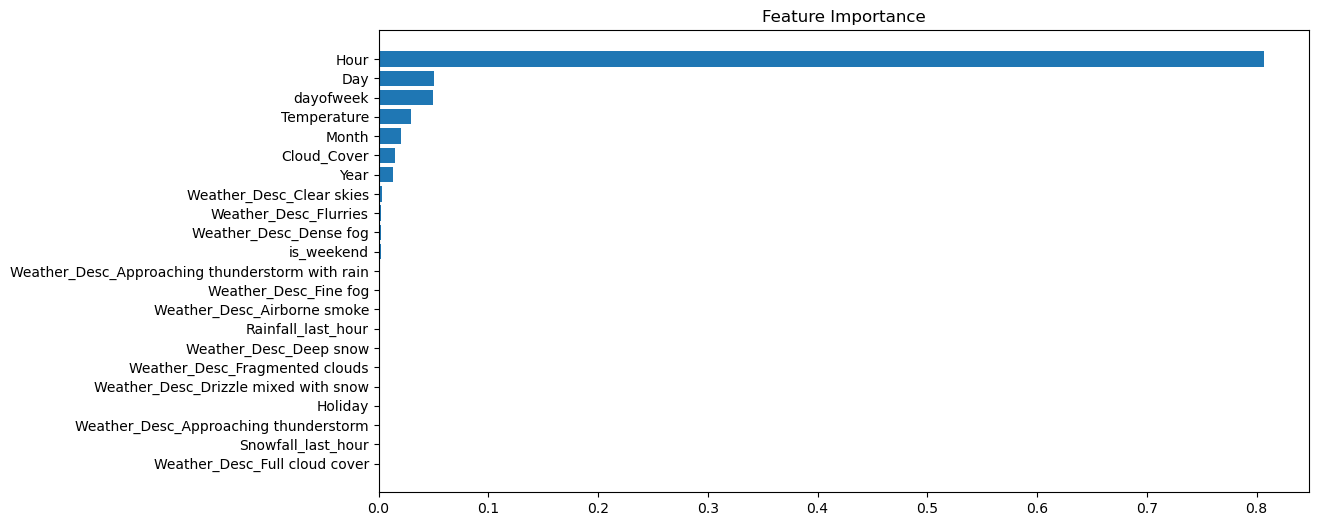

In [240]:
feature_importance_rfr = model_sample_rfr.feature_importances_
sorted_idx = np.argsort(feature_importance_rfr)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance_rfr[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

# Preparing data for final model

In [243]:
tv_df_dp_final = tv_df_dp_bkp

In [244]:
tv_df_dp_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Rainfall_last_hour  38373 non-null  float64
 3   Snowfall_last_hour  38373 non-null  float64
 4   Cloud_Cover         38373 non-null  int64  
 5   Weather             38373 non-null  object 
 6   Weather_Desc        38373 non-null  object 
 7   Date                38373 non-null  object 
 8   Traffic_Vol         38373 non-null  int64  
 9   Year                38373 non-null  int32  
 10  Month               38373 non-null  int32  
 11  Day                 38373 non-null  int32  
 12  Hour                38373 non-null  int32  
 13  dayofweek           38373 non-null  int32  
 14  is_weekend          38373 non-null  bool   
dtypes: bool(1), float64(4), int32(5), int64(2), object(3)

In [245]:
#Changing 'is_weekend' attribute from boolean to int
tv_df_dp_final["is_weekend"] = tv_df_dp_final["is_weekend"].astype(int)

In [246]:
#Applying similar transformations on test data
tv_df_dp_final['Holiday'] = tv_df_dp_final['Holiday'].fillna(0)

In [247]:
#Dropping Weather attribute weather_desc has more details about weather condition
tv_df_dp_final = tv_df_dp_final.drop('Weather', axis = 1)

In [248]:
#Dropping Date attribute as it is not needed
tv_df_dp_final = tv_df_dp_final.drop('Date', axis = 1)

In [249]:
#converting categorical data from weather into numerical using one hot encoding
tv_df_dp_final = pd.get_dummies(tv_df_dp_final, columns = ['Weather_Desc'])

In [250]:
#converting the data type of newly created categorical columns into integer.
tv_df_dp_final = tv_df_dp_final.astype(int)

In [251]:
#Dataframe ready for final modeling
tv_df_dp_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 46 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Holiday                                           38373 non-null  int32
 1   Temperature                                       38373 non-null  int32
 2   Rainfall_last_hour                                38373 non-null  int32
 3   Snowfall_last_hour                                38373 non-null  int32
 4   Cloud_Cover                                       38373 non-null  int32
 5   Traffic_Vol                                       38373 non-null  int32
 6   Year                                              38373 non-null  int32
 7   Month                                             38373 non-null  int32
 8   Day                                               38373 non-null  int32
 9   Hour                                   

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

# Modeling Phase CRISP-DM Methodology

## Select Modeling Technique
 1. Modeling Technique
    - Depending on the nature of the data and understanding 'supervised learning - Ensemble models like RandomForestRegressor, AdaBoostRegressor and GradientBoostRegressor are used'.
 2. Modeling Assumptions
    - If model needs more depth given more variance and less bias then select RandomForestRegressor
    - If model needs boosting because of high bias, low variance and depth then select any of the two boosting regressors.
## Generate Test Design
 1. Test Design
    - Train and Test split was 70% and 30% respectively.
    - Smoke Testing of all models via limited number of attributes
## Build Model
 1. Parameter Settings: GridsearchCV with CV=5 used obtain best model parameters for all three regressors as follows:
    - Best Model: AdaBoostRegressor(learning_rate=0.01, n_estimators=200)
    - Best Model: GradientBoostingRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=5,  n_estimators=200, subsample=0.9
    - Best Model: RandomForestRegressor(max_depth=11, min_samples_leaf=2, min_samples_split=5,  n_estimators=200 ))
    - permutation_importance - repeats set to 10.
 3. Models:
   RandomForestRegressor, AdaBoostRegressor and GradientBoostRegressor re 
 4. Model Description
    - Numeric and categorical transformers were usned
    - Gridsearched and fitted
    - Permutation Importance plotted.
## Assess Model
 1. Model Assessment
   Models seems to be a bit overfitting based on the Train vs Test RMSE with the best model parameters above.
    - Permutation importance shows GradientBoostRegressor gave importance to 15 features followed by RandomFroestRegressor to 8 and by Adaboost to 2. es.
 2. Revised Parameter Settings
   For both GradientBoostRegressor and RandomFroestRegressor overfitting was address by decressing the depth from 7 to 3 and 11 to 7 respectively.
    - Alpha is deminishing which is a good sign as more observations and attributes are added model would be more efficient.

<font size="6">***###Modeling code begin ###***</font>

# When building the ensemble with variations of the same type of model, the as models have either a bias or variance problem.

   - If the base models have high variance, bagging is the solution.
   - If the base models are highly biased, boosting helps.

# Great Discussion on Bias vs Variance curtesy of Washington University: url provided below

https://courses.cs.washington.edu/courses/cse163/24su/2024/07/22/bias-variance-bias-and-bias/#:~:text=Bias%E2%80%93variance%20tradeoff,-During%20model%20evaluation&text=A%20very%20complex%20model%20such,sample%20rather%20than%20the%20trend.

In [252]:
X = tv_df_dp_final.drop('Traffic_Vol', axis = 1)
y = tv_df_dp_final['Traffic_Vol']

In [253]:
# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
X_train.head()

Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  \
14179        0          291                   0                   0   
24468        0          275                   0                   0   
26091        0          264                   0                   0   
29058        0          298                   0                   0   
9551         0          253                   0                   0   

       Cloud_Cover  Year  Month  Day  Hour  dayofweek  ...  \
14179           75  2011      6    7    13          1  ...   
24468           91  2012     11   25    11          6  ...   
26091            5  2013      1    2    18          2  ...   
29058            2  2013      6    6    13          3  ...   
9551             1  2010      7    1    21          3  ...   

       Weather_Desc_Snowfall  Weather_Desc_Soft rain  \
14179                      0                       0   
24468                      0                       0   
26091                      0                       0   
29058                      0                       0   
9551                       0                       0   

       Weather_Desc_Steady rain  Weather_Desc_Storm with a light sprinkle  \
14179                         1                                         0   
24468                         0                                         0   
26091                         0                                         0   
29058                         0                                         0   
9551                          0                                         0   

       Weather_Desc_Storm with mild rain  Weather_Desc_Storm with rain  \
14179                                  0                             0   
24468                                  0                             0   
26091                                  0                             0   
29058                                  0                             0   
9551                                   0                             0   

       Weather_Desc_Stormy weather  Weather_Desc_Strong drizzle  \
14179                            0                            0   
24468                            0                            0   
26091                            0                            0   
29058                            0                            0   
9551                             0                            0   

       Weather_Desc_Sudden windstorm  Weather_Desc_Torrential downpour  
14179                              0                                 0  
24468                              0                                 0  
26091                              0                                 0  
29058                              0                                 0  
9551                               0                                 0  

[5 rows x 45 columns]

<font size="6">***###Finding Base Model Depth###***</font>

  - Bagging: More Depth, More Variance, Less Bias.
  - Boosting: Less Depth, Less Variance, More Bias.

In [254]:

max_depths = list(range(1, 20))

# Grid search cross-validation to tune the max_depth hyperparameter using RMSE loss metric
search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={"max_depth": max_depths},
    scoring="neg_root_mean_squared_error",
    verbose=1,
)
search.fit(X_train, y_train)


Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_root_mean_squared_error', verbose=1)

Best model: DecisionTreeRegressor(max_depth=7)
Mean score: -747.3681431092097


C:\Users\shaif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


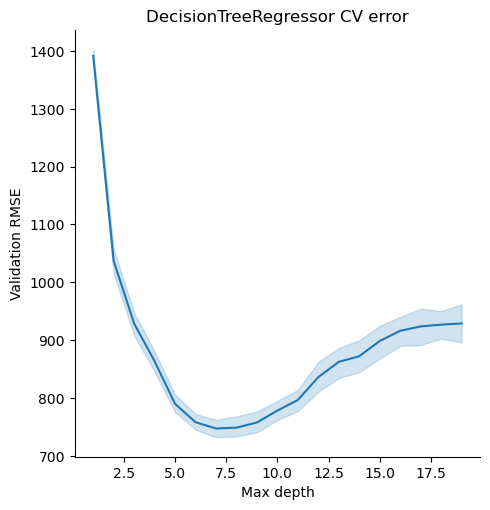

In [255]:
# Print the best score and best estimator at the end of hyperparameter search
reg = search.best_estimator_
print("Best model:", reg)
print("Mean score:", search.best_score_)

# Load results of cross-validation into a DataFrame
cv_results = pd.DataFrame(search.cv_results_)[[
    "param_max_depth",
    "split0_test_score",
    "split1_test_score",
    "split2_test_score",
    "split3_test_score",
    "split4_test_score",
    "mean_test_score",
]]
cv_results = cv_results.melt(id_vars=["param_max_depth"]).set_index("param_max_depth") * (-1)
# Plot the validation scores with confidence intervals
grid = sns.relplot(cv_results, x="param_max_depth", y="value", kind="line")
grid.set(title="DecisionTreeRegressor CV error", xlabel="Max depth", ylabel="Validation RMSE")

<font size="6">***###GridsearchCV for AdaBoostRegressor to find best modal parameters ###***</font>

In [256]:
# Define, Gridsearch and fit the model
model_abr = AdaBoostRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5] #default depth = 3
}

# Set up the grid search
grid_search_abr = GridSearchCV(estimator=model_abr, param_grid=param_grid, cv=5)
grid_search_abr.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]})

 mse: 856131.051834871
 Best alpha: {'learning_rate': 0.01, 'n_estimators': 200}
 Best Model: AdaBoostRegressor(learning_rate=0.01, n_estimators=200)


<Axes: xlabel='Features'>

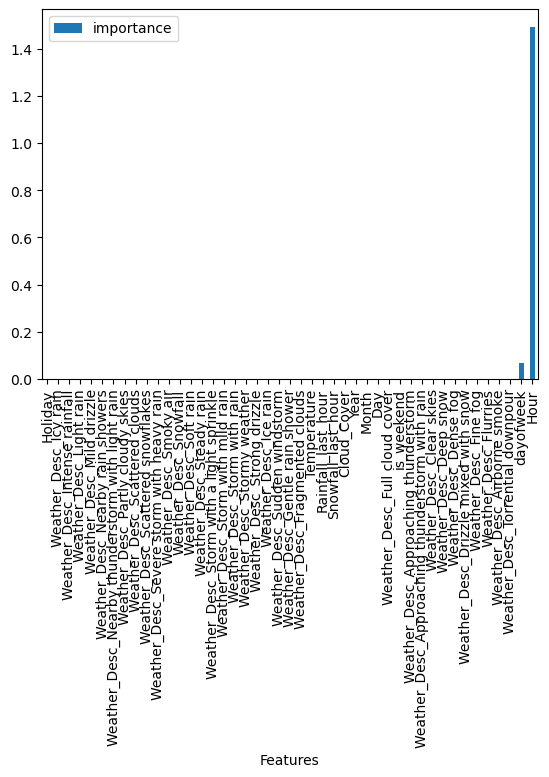

In [257]:
y_train_preds = grid_search_abr.predict(X_train)
ridge_model_mse = mean_squared_error(y_train,y_train_preds)
best_ridge_model = grid_search_abr.best_estimator_
best_alpha = grid_search_abr.best_params_
print(f' mse: {ridge_model_mse}')
print(f' Best alpha: {best_alpha}')
print(f' Best Model: {best_ridge_model}')

perm_imp = permutation_importance(grid_search_abr,X_train,y_train,n_repeats=10,random_state= 42)
perm_imp_df = pd.DataFrame(perm_imp.importances_mean,index=X.columns, columns=['importance']).sort_values(by='importance')
perm_imp_df = perm_imp_df.reset_index()
perm_imp_df.rename(columns={'index': 'Features'}, inplace=True)
perm_imp_df.plot.bar(x='Features', y='importance')

<font size="6">***###GridsearchCV for GradientBoostingRegressor to find best modal parameters ###***</font>

In [258]:
# Define, Gridsearch and fit the model
model_gbr = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],    # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.5], # Step size at each iteration to shrink the contribution of each tree
    'max_depth': [3,7,11],             # Maximum depth of the individual trees
    'min_samples_split': [5],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2],           # Minimum number of samples required to be at a leaf node
    'subsample': [0.9]        # Fraction of samples used for fitting each tree
}

# Set up the grid search
grid_search_gbr = GridSearchCV(estimator=model_gbr, param_grid=param_grid, cv=5)
grid_search_gbr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [2],
                         'min_samples_split': [5],
                         'n_estimators': [50, 100, 200], 'subsample': [0.9]})

 mse: 119698.76421476653
 Best alpha: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.9}
 Best Model: GradientBoostingRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                          n_estimators=200, subsample=0.9)


<Axes: xlabel='Features'>

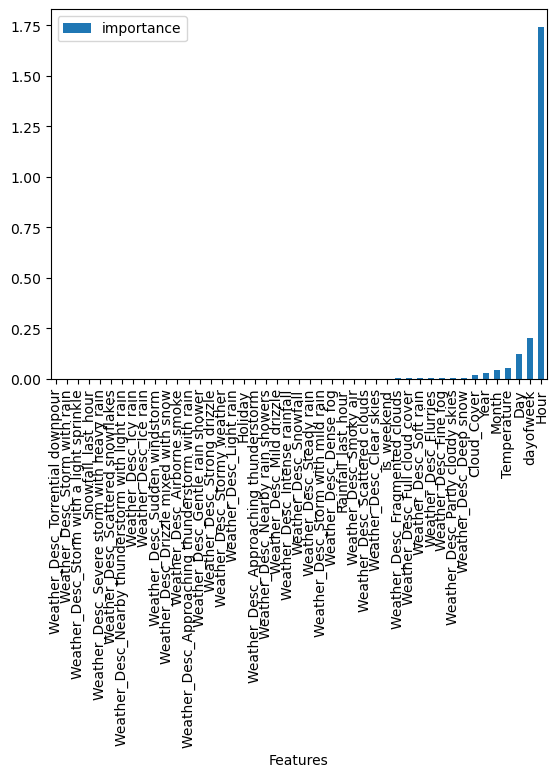

In [259]:
y_train_preds = grid_search_gbr.predict(X_train)
ridge_model_mse = mean_squared_error(y_train,y_train_preds)
best_ridge_model = grid_search_gbr.best_estimator_
best_alpha = grid_search_gbr.best_params_
print(f' mse: {ridge_model_mse}')
print(f' Best alpha: {best_alpha}')
print(f' Best Model: {best_ridge_model}')

perm_imp = permutation_importance(grid_search_gbr,X_train,y_train,n_repeats=10,random_state= 42)
perm_imp_df = pd.DataFrame(perm_imp.importances_mean,index=X.columns, columns=['importance']).sort_values(by='importance')
perm_imp_df = perm_imp_df.reset_index()
perm_imp_df.rename(columns={'index': 'Features'}, inplace=True)
perm_imp_df.plot.bar(x='Features', y='importance')

<font size="6">***###GridsearchCV for RandomForestRegressor to find best modal parameters ###***</font>

In [260]:
# Define, search and fit the model
model_rfr = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],    # Number of boosting stages (trees)
    'max_depth': [3,7,11],             # Maximum depth of the individual trees
    'min_samples_split': [5],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2]           # Minimum number of samples required to be at a leaf node
}

# Set up the grid search
grid_search_rfr = GridSearchCV(estimator=model_rfr, param_grid=param_grid, cv=5)
grid_search_rfr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 7, 11], 'min_samples_leaf': [2],
                         'min_samples_split': [5],
                         'n_estimators': [50, 100, 200]})

 mse: 283254.2249499756
 Best alpha: {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
 Best Model: RandomForestRegressor(max_depth=11, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)


<Axes: xlabel='Features'>

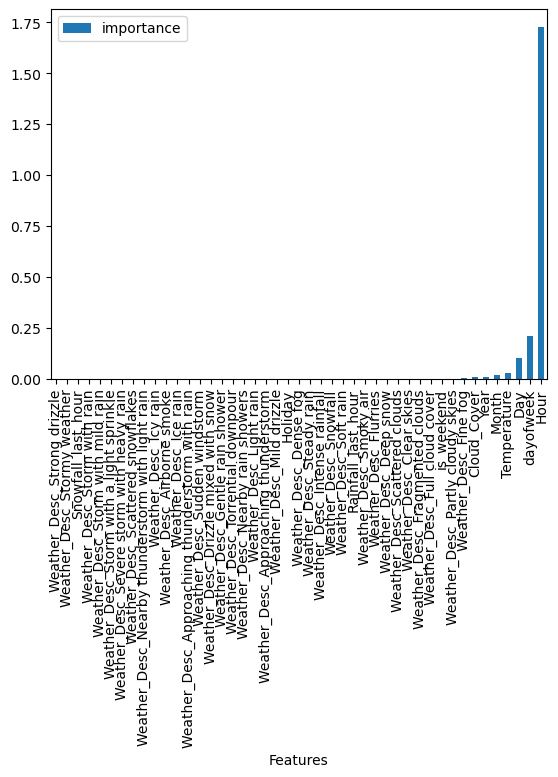

In [261]:
y_train_preds = grid_search_rfr.predict(X_train)
ridge_model_mse = mean_squared_error(y_train,y_train_preds)
best_ridge_model = grid_search_rfr.best_estimator_
best_alpha = grid_search_rfr.best_params_
print(f' mse: {ridge_model_mse}')
print(f' Best alpha: {best_alpha}')
print(f' Best Model: {best_ridge_model}')

perm_imp = permutation_importance(grid_search_rfr,X_train,y_train,n_repeats=10,random_state= 42)
perm_imp_df = pd.DataFrame(perm_imp.importances_mean,index=X.columns, columns=['importance']).sort_values(by='importance')
perm_imp_df = perm_imp_df.reset_index()
perm_imp_df.rename(columns={'index': 'Features'}, inplace=True)
perm_imp_df.plot.bar(x='Features', y='importance')

<font size="6">***###Gradient Boosting Regressor Best Model validation with Test Data###***</font>

## Best parameters derived from GridsearchCV for Gradient Boosting Regressor tuning below are used for final modeling and testing
Best alpha: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.9}
 Best Model: GradientBoostingRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                          n_estimators=200, subsample=0.9)

Test RMSE: 419.7438237212487
train RMSE: 569.8459181496311


Text(0.5, 1.0, 'Feature Importance')

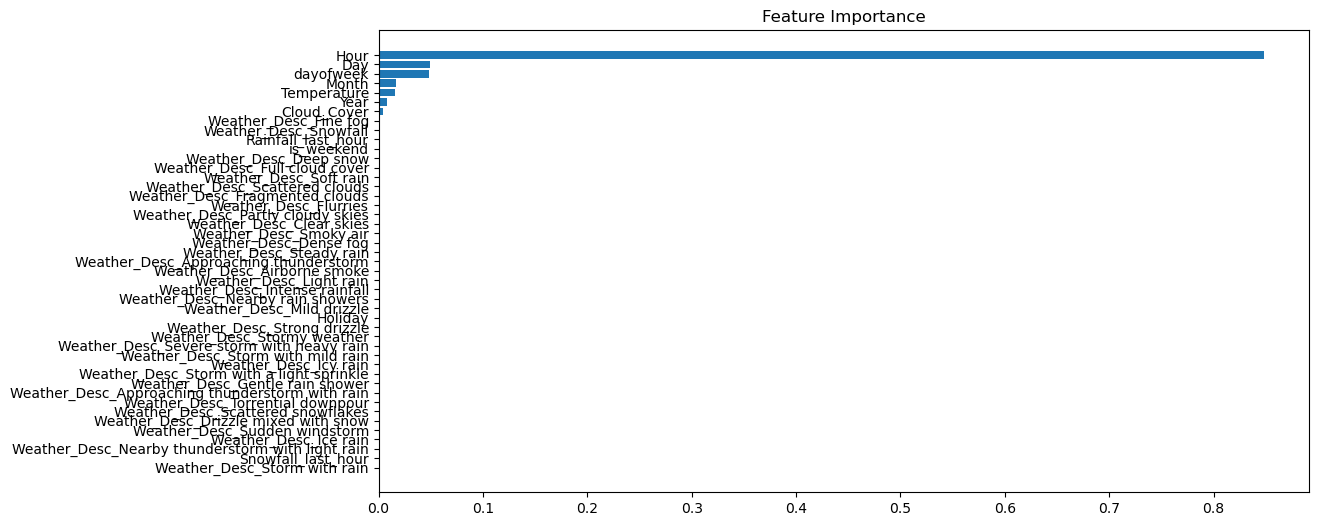

In [262]:
# Initialize GradientBoostingRegressor with best model hyperparameters
model_gbr_final = GradientBoostingRegressor(
    n_estimators=200,            # Number of boosting stages (trees)
    learning_rate=0.1,           # Step size at each iteration to shrink the contribution of each tree
    max_depth=7,                 # Maximum depth of the individual trees
    min_samples_split=5,        # Minimum number of samples required to split an internal node
    min_samples_leaf=2,          # Minimum number of samples required to be at a leaf node
    subsample=0.9,               # Fraction of samples used for fitting each tree
    random_state=42
)

# Fiting the model
model_gbr_final.fit(X_test, y_test)

# Predict and evaluate
y_test_pred_gbr_final = model_gbr_final.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_gbr_final))

# Print the validation RMSE
print(f"Test RMSE: {rmse}")

y_train_pred_gbr_final = model_gbr_final.predict(X_train)

# Calcualting the RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_gbr_final))
print(f"train RMSE: {rmse}")

feature_importance = model_gbr_final.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

<font size="6">***###Random Forest Regressor Model validation with Test Data###***</font>

## Best parameters derived from GridsearchCV for Random Forest Regressor tuning below are used for final modeling and testing
Best alpha: {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
 Best Model: RandomForestRegressor(max_depth=11, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)

Validation RMSE: 571.0510281676824
train RMSE: 661.7657289021438


Text(0.5, 1.0, 'Feature Importance')

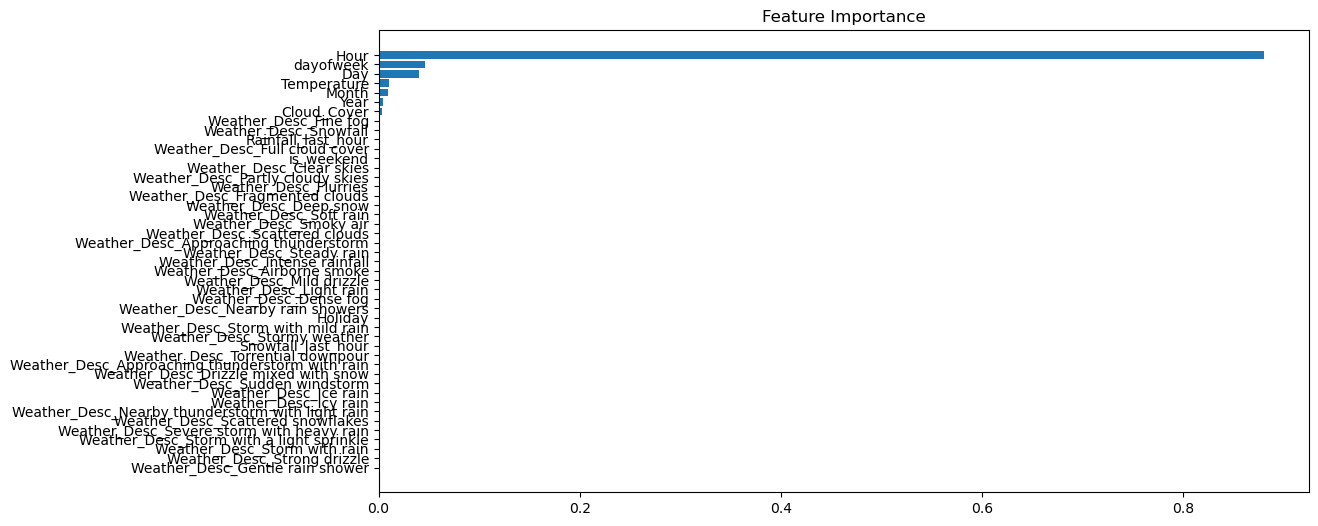

In [263]:
# Initialize AdaBoostRegressor with best model hyperparameters
model_rfr_final = RandomForestRegressor(
     n_estimators = 200,    # Number of boosting stages (trees)
     max_depth = 11,        # Maximum depth of the individual trees
     min_samples_split = 5, # Minimum number of samples required to split an internal node
     min_samples_leaf = 2   # Minimum number of samples required to be at a leaf node
)

# Fit the model
model_rfr_final.fit(X_test, y_test)

# Predict and evaluate
y_test_pred_rfr_final = model_rfr_final.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rfr_final))

# Print the validation RMSE
print(f"Validation RMSE: {rmse}")

y_train_pred_rfr_final = model_rfr_final.predict(X_train)

# Calcualting the RMSE as asked
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rfr_final))
print(f"train RMSE: {rmse}")

feature_importance_rfr = model_rfr_final.feature_importances_
sorted_idx = np.argsort(feature_importance_rfr)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance_rfr[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


<font size="6">***###Further Tuning Tips###***</font>

## Further Tuning done by adjusting hyperparameters depth to reduce overfitting

### GradientBoostingRegressor
### Test RMSE: 419.7438237212487 vs train RMSE: 569.8459181496311 with depth 7
### Test RMSE: 716.996087665697 vs train RMSE: 734.8266513196727 with depth 3

Test RMSE: 716.996087665697
train RMSE: 734.8266513196727


Text(0.5, 1.0, 'Feature Importance')

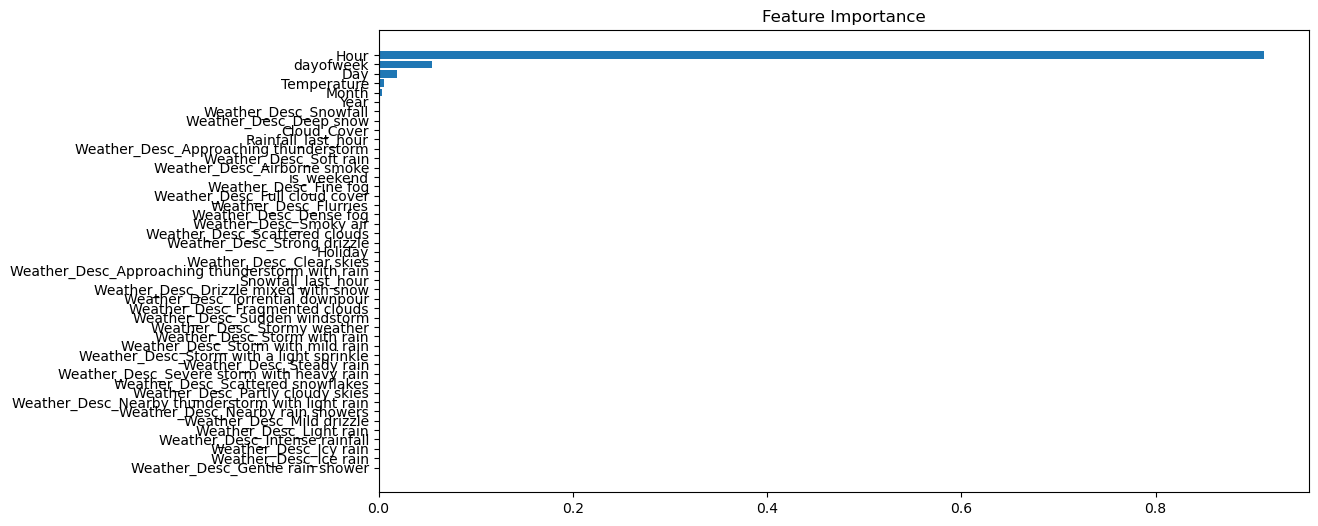

In [264]:
# Initialize GradientBoostingRegressor with best model hyperparameters and adjusting depth to 3
model_gbr_final = GradientBoostingRegressor(
    n_estimators=200,            # Number of boosting stages (trees)
    learning_rate=0.1,           # Step size at each iteration to shrink the contribution of each tree
    max_depth=3,                 # Maximum depth of the individual trees
    min_samples_split=5,        # Minimum number of samples required to split an internal node
    min_samples_leaf=2,          # Minimum number of samples required to be at a leaf node
    subsample=0.9,               # Fraction of samples used for fitting each tree
    random_state=42
)

# Fiting the model
model_gbr_final.fit(X_test, y_test)

# Predict and evaluate
y_test_pred_gbr_final = model_gbr_final.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_gbr_final))

# Print the validation RMSE
print(f"Test RMSE: {rmse}")

y_train_pred_gbr_final = model_gbr_final.predict(X_train)

# Calcualting the RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_gbr_final))
print(f"train RMSE: {rmse}")

feature_importance = model_gbr_final.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

### RandomForestRegressor
### Validation RMSE: 571.0510281676824 vs train RMSE: 661.7657289021438 with depth 11
### Validation RMSE: 692.7552453314175 vs train RMSE: 713.274734783129 with depth 7

Validation RMSE: 692.7552453314175
train RMSE: 713.274734783129


Text(0.5, 1.0, 'Feature Importance')

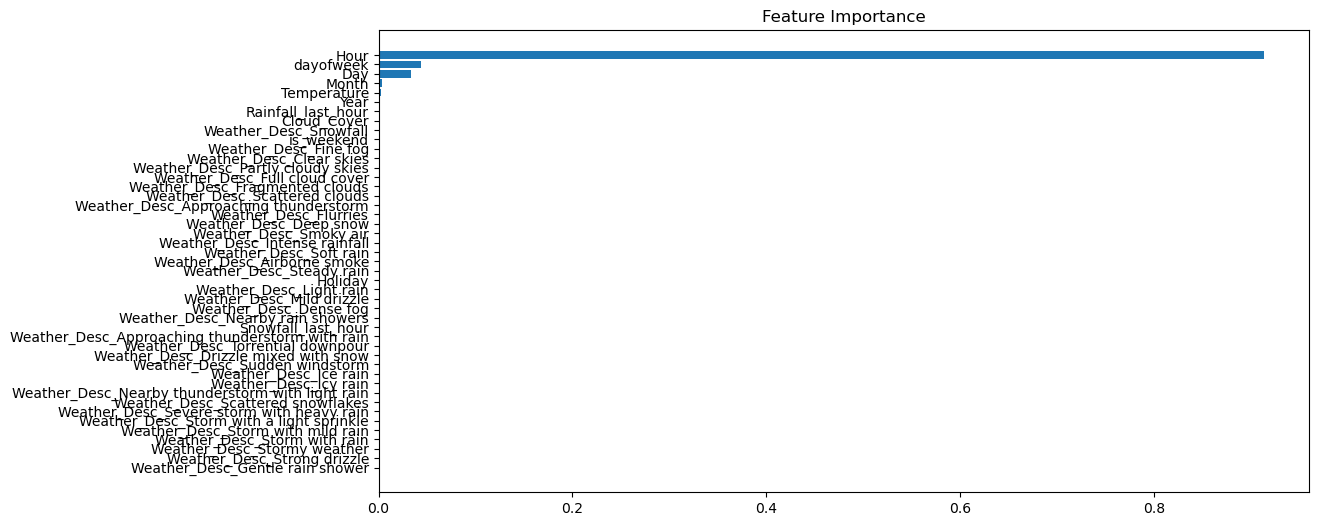

In [265]:
# Initialize RandomForestRegressor with best model hyperparameters and adjusting depth to 7
model_rfr_final = RandomForestRegressor(
     n_estimators = 200,    # Number of boosting stages (trees)
     max_depth = 7,        # Maximum depth of the individual trees
     min_samples_split = 5, # Minimum number of samples required to split an internal node
     min_samples_leaf = 2   # Minimum number of samples required to be at a leaf node
)

# Fit the model
model_rfr_final.fit(X_test, y_test)

# Predict and evaluate
y_test_pred_rfr_final = model_rfr_final.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rfr_final))

# Print the validation RMSE
print(f"Validation RMSE: {rmse}")

y_train_pred_rfr_final = model_rfr_final.predict(X_train)

# Calcualting the RMSE as asked
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rfr_final))
print(f"train RMSE: {rmse}")

feature_importance_rfr = model_rfr_final.feature_importances_
sorted_idx = np.argsort(feature_importance_rfr)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance_rfr[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

# Evaluation Phase CRISP-DM Methodology

## Evaluate Results
 1. Assessment of Data Mining Results w.r.t. Business Success Criteria
    - Results Hour and Day are two crucial influencial factors of Traffic Volume. Other factors like Temperateure, Cloudy Skys, Snow or Rainfall has less of an influence and the objectives can be met with the predictions by both models(RandomForestRegressor/GradientBoostRegressor).
    - Recommendations to City: Both models work based on the data provided, if rolling average of people in city with cars (incoming and leaving the city) then more precise predictions can be made. 
 3. Approved Model
    - This models can be approved as it has met the business criteria.s
## Review Process
 1. Review of Proces
    - if business doesn't need more attributes to be added to the model for assessment though they may have less impact and more observations updated appropriate values for run another round of validation and evaluation then the is a pass.
## Determine Next Steps
 1. List of Possible Action
    - In real world Budgetory and Time consitrainsts are to be considered for further refinement of the model.
 2.  Decision
    -Since this model is meeting the business objectives this can be deployed. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

# Deployment Phase CRISP-DM Methodology

## Plan Deployment
 1. Deployment Plan : Client specific deployment plan/process should be followed. Packaging, 
Tesingt model with test cod, 
cringate a bundeand deploy using client specific tools.l 
## Plan Monitoring and Maintenance
 1. Monitoring nd. Maintenancl
    - Client specific strategy/process/procedures should be followed.an
## Produce Final Report start
 1. Final Report
## Determine Business Objectives
 1. Background - Predict Volume of Traffic on a given day for a given City.
    A. The dataset provided contains 8 years of traffic observations with 9 attributes that may influence the traffic volume.
    B. Some attributes can be derived of the existing ones to meet the business objectives.  
 2. Business Objectives
    A. Business objective is to understand what factors influence the volume of traffic so that they can:
       - Optimize traffic signal timing and minimize congestion.
       - Alert drivers to traffic conditions along their preferred routes.
       - Estimate traffic flow in the event of emergencies or disasters.
       - Provide accurate travel time predictions to commuters and travelers.
       - Expansion of roads, parking lots development. 
    B. Based on findings the final report is provided to the city they can address the needs mentioned in the objectives. 
 3. Business Success Criteria - Success if above two objectives are met..

### Produce Project Plan
 1. Data Understanding (Exlore), Data Preparation (clean, construct, format, integrate), Model (Technique, Design, Build, Assess), Evaluate (Model results vs Business Success Criteria), Deplomenty (Maintainance/Supportn
 2. Initial Assessment of Tools and Techniuesq - Data Mining concepts/Principle Component Analysis/Clustering/K-fold validation/Attribute selection, encodeing/Models -RandomForestRegressor/GradientBoostRegressor/AdaBoostRegressoro, Gridsearch to selecingt best model.

### Data Preparation.### Select Data
 1. Rationale for Inclusion / Exclu
    
    #### Included:
    - All core attributes are kept.
    #### Excluded:
    - Attributes 'Weather' and 'Date' were excluded as 'Weather_Desc' and 'TimeStamp' had all details.

### Select Modeling Technique
 1. Modeling Technique
    - Depending on the nature of the data and understanding 'supervised learning -RandomForestRegressor/GradientBoostRegressor/AdaBoostRegressorn models were used'.
      
 2. Modeling Assumptions
    
    -RandomForestRegressor and/or GradientBoostRegressor/AdaBoostRegressor used based on variance and bias in data..

### Evaluate Results

  1. Assessment of Data Mining Results w.r.t. Business Success Criteria Results showHour and Dayr are the two most important factors (andTemperaturer andother weather attributes followed themr)that influence the Traffic Volume moste, which is achieved and thecitys goasl is met.
 23.Recommendations to City: Both models work based on the data provided, if rolling average of people in city with cars (incoming and leaving the city) then more precise predictions can be made. .

## Produce Final Report End

 2. Final Presentation

- The models were developed based on the dataset and attributes provided.
- The models ranked the importance of each attribute impacting thevolume of traffic..
- Actionable Recommendation to client is to keep up withdata to retrain and tune models for maintainence and support purposes.


## Review Project

 1. Experience Documentation.
- Lessons learnt is the every phase of the project is critical and important. The understanding/preparation phases are as important as modeling phases
- The biggest challenge was to gridsearch for the optimal parameters and then fine tuning them to reduce overfitting..
- Model can be optimized by includingrolling average of citizens in the city and Holidays like juneteenth.
.
